In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
import sympy as sym
import os.path as path
import os
import wget


In [2]:
if not path.exists('Data'):
    os.mkdir('Data')

file = 'Data/Interpolacion.dat'
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/InterpolacionNewton.csv'

if not path.exists(file):
    Path_ = wget.download(url, file)

else:
    Path_ = file


In [3]:
Data = pd.read_csv(Path_)
Data


,X,Y
0,-3,39
1,-1,19
2,1,-21
3,3,-57
4,5,-65
5,7,-21
6,9,99


In [4]:
X = np.float64(Data.X)
Y = np.float64(Data.Y)

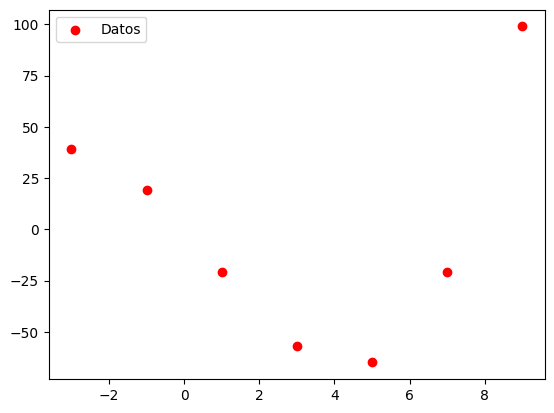

In [6]:
plt.scatter(X, Y, color = 'red', label = 'Datos')
plt.legend()
plt.show()

In [12]:
diff = np.zeros((len(X), len(X)))
diff[:, 0] = Y

for i in range(1, len(X)):
    for j in range(i, len(X)):
        diff[j, i] = diff[j, i-1]- diff[j-1, i-1]

diff

array([[ 39.,   0.,   0.,   0.,   0.,   0.,   0.],
       [ 19., -20.,   0.,   0.,   0.,   0.,   0.],
       [-21., -40., -20.,   0.,   0.,   0.,   0.],
       [-57., -36.,   4.,  24.,   0.,   0.,   0.],
       [-65.,  -8.,  28.,  24.,   0.,   0.,   0.],
       [-21.,  44.,  52.,  24.,   0.,   0.,   0.],
       [ 99., 120.,  76.,  24.,   0.,   0.,   0.]])

In [17]:
def a_indexes(n):
    a = np.zeros(n)
    a[0] = diff[0, 0]
    for i in range(1, n):
        a[i] = diff[i, i]
    return a

def polinomio(X, a):
    n = len(a)
    p = 1
    for i in range(1, n):
        p *= (X-X[i-1])
        for j in range(i):
            p /= (X[i]-X[j])
    

In [16]:
a = a_indexes(len(X))
p = polinomio(X, a)
p

array([ 3.9000e+01, -1.0000e+00, -2.0100e+02,  5.9100e+02,  3.5270e+03,
        9.7590e+03,  2.0439e+04])